In [1]:
import sklearn 

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
from sklearn.model_selection import KFold

In [7]:
from sklearn import metrics

In [8]:
df = pd.read_csv('~/Desktop/machine_learning/assignment-1/titanic-1.csv')

In [9]:
df.head(10)

,pclass,sex,age,sibsp,parch,embarked,survived
0,first,male,48.0,zero,zero,S,NSUR
1,first,female,63.0,one,zero,S,NSUR
2,first,male,39.0,zero,zero,S,SUR
3,first,female,53.0,two,zero,S,NSUR
4,first,male,71.0,zero,zero,C,SUR
5,first,male,47.0,one,zero,C,SUR
6,first,female,18.0,one,zero,C,NSUR
7,first,female,24.0,zero,zero,C,NSUR
8,first,female,26.0,zero,zero,S,NSUR
9,first,male,80.0,zero,zero,S,NSUR


In [10]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    2
survived    0
dtype: int64

In [11]:
# df = df[pd.notnull(df['embarked'])]

df['embarked'] = df['embarked'].fillna('S')

In [12]:
df.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
survived    0
dtype: int64

In [13]:
df.sample(5)

,pclass,sex,age,sibsp,parch,embarked,survived
61,first,female,22.0000,zero,zero,S,NSUR
133,first,male,42.0000,zero,zero,S,SUR
889,third,male,20.0000,zero,zero,S,SUR
184,first,female,23.0000,one,zero,C,NSUR
677,third,male,0.3333,zero,two,S,SUR


In [14]:
df2 = df

In [15]:
df2.pclass.unique()

array(['first', 'second', 'third'], dtype=object)

In [16]:
pclass = {'first' : 0, 'second' : 1, 'third' : 2}

df2.pclass = [pclass[item] for item in df2.pclass]

In [17]:
df2.sample(5)

,pclass,sex,age,sibsp,parch,embarked,survived
969,2,female,2.0,zero,one,S,SUR
293,1,female,19.0,one,zero,S,NSUR
793,2,male,17.0,zero,zero,S,SUR
858,2,male,18.0,zero,zero,S,SUR
816,2,male,29.0,zero,zero,S,SUR


In [18]:
df2.sex.unique()

array(['male', 'female'], dtype=object)

In [19]:
sex = {'male' : 0, 'female' : 1}

df2.sex = [sex[item] for item in df2.sex]

df2.sample(5)

,pclass,sex,age,sibsp,parch,embarked,survived
768,2,1,27.0,one,zero,S,SUR
175,0,0,65.0,zero,zero,S,SUR
437,1,1,42.0,one,zero,S,NSUR
493,1,1,24.0,two,three,S,NSUR
793,2,0,17.0,zero,zero,S,SUR


In [20]:
df2.sibsp.unique()

array(['zero', 'one', 'two', 'three', 'four'], dtype=object)

In [21]:
sibsp = {'zero' : 0, 'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4}

df2.sibsp = [sibsp[item] for item in df2.sibsp]

df2.sample(5)

,pclass,sex,age,sibsp,parch,embarked,survived
986,2,1,9.0,1,one,C,NSUR
824,2,0,24.0,0,zero,S,SUR
862,2,0,20.0,1,one,C,NSUR
658,2,0,43.0,0,zero,S,SUR
842,2,0,35.0,0,zero,C,SUR


In [22]:
df2.parch.unique()

array(['zero', 'one', 'two', 'four', 'three'], dtype=object)

In [23]:
parch = {'zero' : 0, 'one' : 1, 'two' : 2, 'three' : 3, 'four' : 4}

df2.parch = [parch[item] for item in df2.parch]

df2.sample(7)

,pclass,sex,age,sibsp,parch,embarked,survived
961,2,0,33.0,0,0,C,SUR
984,2,0,25.0,0,0,S,NSUR
161,0,0,29.0,0,0,S,SUR
236,0,0,45.0,1,1,C,NSUR
408,1,1,60.0,1,0,S,SUR
129,0,0,27.0,0,0,C,NSUR
798,2,0,22.0,0,0,S,SUR


In [24]:
df2.embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
embarked = {'S' : 0, 'C' : 1, 'Q' : 2}

df2.embarked = [embarked[item] for item in df2.embarked]

df2.sample(10)

,pclass,sex,age,sibsp,parch,embarked,survived
684,2,0,21.0,2,0,0,SUR
309,1,1,20.0,1,0,0,NSUR
935,2,0,16.0,0,0,0,SUR
765,2,1,27.0,0,0,0,NSUR
819,2,0,22.0,0,0,1,NSUR
184,0,1,23.0,1,0,1,NSUR
613,2,0,6.0,1,1,1,SUR
153,0,1,39.0,0,0,0,NSUR
636,2,0,21.0,0,0,0,SUR
570,2,0,26.0,0,0,0,SUR


In [26]:
df2.survived.unique()

array(['NSUR', 'SUR'], dtype=object)

In [27]:
survived = {'NSUR' : 0, 'SUR' : 1}

df2.survived = [survived[item] for item in df2.survived]

df2.sample(8)

,pclass,sex,age,sibsp,parch,embarked,survived
810,2,0,18.0,1,1,0,1
164,0,1,58.0,0,0,1,0
137,0,1,51.0,1,0,0,0
623,2,0,35.0,0,0,0,1
145,0,0,49.0,0,0,0,0
117,0,0,38.0,0,1,0,1
238,0,0,57.0,1,0,1,1
826,2,1,45.0,0,0,0,1


In [28]:
y = df2.survived

In [29]:
df2 = df2.drop(columns = ['survived'])

In [30]:
df2.sample(5)

,pclass,sex,age,sibsp,parch,embarked
415,1,0,22.0,2,0,0
576,2,0,35.0,0,0,0
452,1,0,70.0,0,0,0
493,1,1,24.0,2,3,0
868,2,0,28.0,0,0,0


In [31]:
kf = KFold(n_splits=5)

In [42]:
clf1 = DecisionTreeClassifier(random_state = 1, min_impurity_decrease = 0.001)

In [43]:
clf1.fit(df2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [44]:
# len(df2)

In [45]:
# df2.loc[df2['pclass'] == 'first']

In [46]:
accuracy1 = cross_val_score(clf1, df2, y, cv=kf)

In [47]:
# predictions = clf.predict(X_test)

In [48]:
# print('Score:', model.score(X_test, y_test))

In [49]:
print(accuracy1)

[0.69902913 0.84390244 0.82439024 0.70243902 0.72682927]


In [50]:
recall1 = cross_val_score(clf1, df2, y, cv=kf, scoring='recall')

In [51]:
print(recall1)

[0.36111111 0.88571429 0.90909091 0.86       0.86363636]


In [52]:
accuracy1.mean()

0.7593180203646697

In [57]:
clf2 = DecisionTreeClassifier(random_state = 1, min_impurity_decrease = 0.0025)

In [58]:
clf2.fit(df2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0025, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [59]:
accuracy2 = cross_val_score(clf2, df2, y, cv=kf)

In [61]:
recall2 = cross_val_score(clf2, df2, y, cv=kf, scoring='recall')

In [62]:
clf3 = DecisionTreeClassifier(random_state = 1, min_impurity_decrease = 0.005)

In [63]:
clf3.fit(df2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [64]:
accuracy3 = cross_val_score(clf3, df2, y, cv=kf)

In [65]:
recall3 = cross_val_score(clf3, df2, y, cv=kf, scoring='recall')

In [66]:
clf4 = DecisionTreeClassifier(random_state = 1, min_impurity_decrease = 0.0075)

In [67]:
clf4.fit(df2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0075, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [68]:
accuracy4 = cross_val_score(clf4, df2, y, cv=kf)

In [69]:
recall4 = cross_val_score(clf4, df2, y, cv=kf, scoring='recall')

In [70]:
clf5 = DecisionTreeClassifier(random_state = 1, min_impurity_decrease = 0.01)

In [71]:
clf5.fit(df2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [72]:
accuracy5 = cross_val_score(clf5, df2, y, cv=kf)

In [73]:
recall5 = cross_val_score(clf5, df2, y, cv=kf, scoring='recall')

In [74]:
avg_acc = [accuracy1.mean(), accuracy2.mean(), accuracy3.mean(), accuracy4.mean(), accuracy5.mean()]

In [79]:
avg_recall = [recall1.mean(), recall2.mean(), recall3.mean(), recall4.mean(), recall5.mean()]

In [80]:
avg_recall

[0.7759105339105339,
 0.7954618916437098,
 0.9028836416109144,
 0.9028836416109144,
 0.9028836416109144]

In [83]:
recall5

array([0.97222222, 0.93333333, 0.9338843 , 0.98666667, 0.68831169])

In [78]:
accuracy2

array([0.66504854, 0.86829268, 0.82926829, 0.73658537, 0.71219512])

In [84]:
pruning_para = [0.001, 0.0025, 0.005, 0.0075, 0.01]

In [86]:
data = pd.DataFrame({'Average Accuracy' : avg_acc, 'Average Recall' : avg_recall, 'Pruning Parameters' : pruning_para})

In [87]:
data

,Average Accuracy,Average Recall,Pruning Parameters
0,0.759318,0.775911,0.0010
1,0.762278,0.795462,0.0025
2,0.784570,0.902884,0.0050
3,0.784570,0.902884,0.0075
4,0.778717,0.902884,0.0100


In [88]:
import seaborn

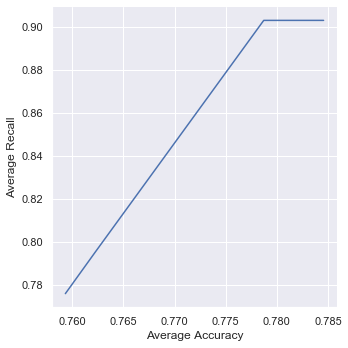

In [102]:
seaborn.set(style='darkgrid')
seaborn.relplot(x='Average Accuracy', y='Average Recall', kind = 'line', data=data)

In [105]:
from sklearn.tree import export_graphviz
dotfile = open('~/Desktop/machine_learning/tree.dot', 'w')
export_graphviz(clf1, out_file=dotfile, feature_names=df2.columns)
dotfile.close()

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/machine_learning/tree.dot'

In [107]:
clf1.plot_tree() 

AttributeError: 'DecisionTreeClassifier' object has no attribute 'plot_tree'

In [108]:
from sklearn import tree

In [109]:
clf = tree.DecisionTreeClassifier()

In [110]:
clf = clf.fit(df2, y)

In [115]:
from sklearn.tree.export import export_text 

In [127]:
r = export_text(clf, feature_names = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'])

In [128]:
print(r)

|--- sex <= 0.50
|   |--- age <= 9.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- age <= 0.38
|   |   |   |   |--- class: 1
|   |   |   |--- age >  0.38
|   |   |   |   |--- age <= 0.79
|   |   |   |   |   |--- age <= 0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  0.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  0.79
|   |   |   |   |   |--- embarked <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- embarked >  0.50
|   |   |   |   |   |   |--- pclass <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pclass >  1.50
|   |   |   |   |   |   |   |--- age <= 6.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  6.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |--- sibsp >  2.50
|   |   |   |--- age <= 3.50
|   |   |   |   |--- age <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  2.50
|   |   |   |   |   |--- class: 0
|   |  

In [122]:
df2.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')